In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 3: Quantization

In this task, you have to write a simple code to change the [Quantisation](https://www.tutorialspoint.com/dip/concept_of_quantization.htm) level of a given digital image. The default quantisation level for digital images are 8-bits (i.e. 256 levels). We will use two different quantisation methods.

* Uniform
* Lloyd Max

Please refer to the class slides on both methods. For other reference you can follow [this](http://www.cspl.umd.edu/631/631pub06_sec8bcompressBasic.pdf) or [this](https://web.stanford.edu/class/ee398a/handouts/lectures/05-Quantization.pdf)

In [ ]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-f0dv_m3x
  Created wheel for ee604-plugins: filename=ee604_plugins-0.1.4-cp36-none-any.whl size=2305 sha256=c5993c216e1b0c7387eb9d01e0376d99822668e99c57d6dcb3fbebaac3e1d176
  Stored in directory: /tmp/pip-ephem-wheel-cache-4r14amqc/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-f0dv_m3x


In [ ]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset

download_dataset(assignment_no=1, task_no=3) # download data for this assignment

Download Complete!


### Task 3.1 Quantisation on Grayscale Image

In [ ]:
def uniform_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use uniform quantisation.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels
                       - Note that range should always be between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    M = 255 # max pixel value
    m = 0 # min pixel value
    L = 2**quantisation_bit # Quantization levels
    h, w = img.shape
    out_img = img.copy()

    partition = np.linspace(m, M, L) 
    values = []

    for i in range(L-1):
        values.append( (partition[i] + partition[i+1]) / 2 )

    for i in range(h):
        for j in range(w):
            x = img[i][j]
            for k, y in enumerate(partition):
                if x <= y:
                    if y:
                        out_img[i][j] = values[k-1]
                    else:
                        out_img[i][j] = values[0]
                    break

    out_img = out_img.astype('uint8')
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [ ]:
def nonuniform_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use Lloyd-Max non-uniform quantisation method.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels i.e. '0' and '255'
                       - Note that range should always between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    M = 255 # max pixel value
    m = 0 # min pixel value
    L = 2**quantisation_bit # Quantization levels
    h, w = img.shape
    out_img = img.copy()
    iter = 30
    fx = np.histogram(img, bins= np.arange(0,256))

    # Initializing
    partition = np.linspace(m, M, L)
    values = np.zeros(L+1)

    # Iterative approach
    for _ in range(iter):
        for i in range(L-1):
            values[i+1] = round((partition[i] + partition[i+1]) / 2)

        for i in range(L):
            num = 0
            den = 0

            for j in range(int(values[i]), int(values[i+1])):
                num += fx[0][j] * j
                den += fx[0][j] 

            if num != 0 :
                partition[i] = num / den
            else:
                partition[i] = (values[i] + values[i+1]) / 2

    print(partition)
    print(values)
    for i in range(h):
        for j in range(w):
            x = img[i][j]
            for k, y in enumerate(partition):
                if x <= y:
                    if y != 0:
                        out_img[i][j] = int(values[k-1])
                    else:
                        out_img[i][j] = int(values[0])
                    break

    out_img = out_img.astype('uint8')
    #############################
    # End your code here ########
    #############################
    
    return out_img

#### Quantise the given image for following bit-levels = 2, 4, 6, 8 using both the methods. 
Run below cell to plot images in a pyplot table and write your observation on the differences.

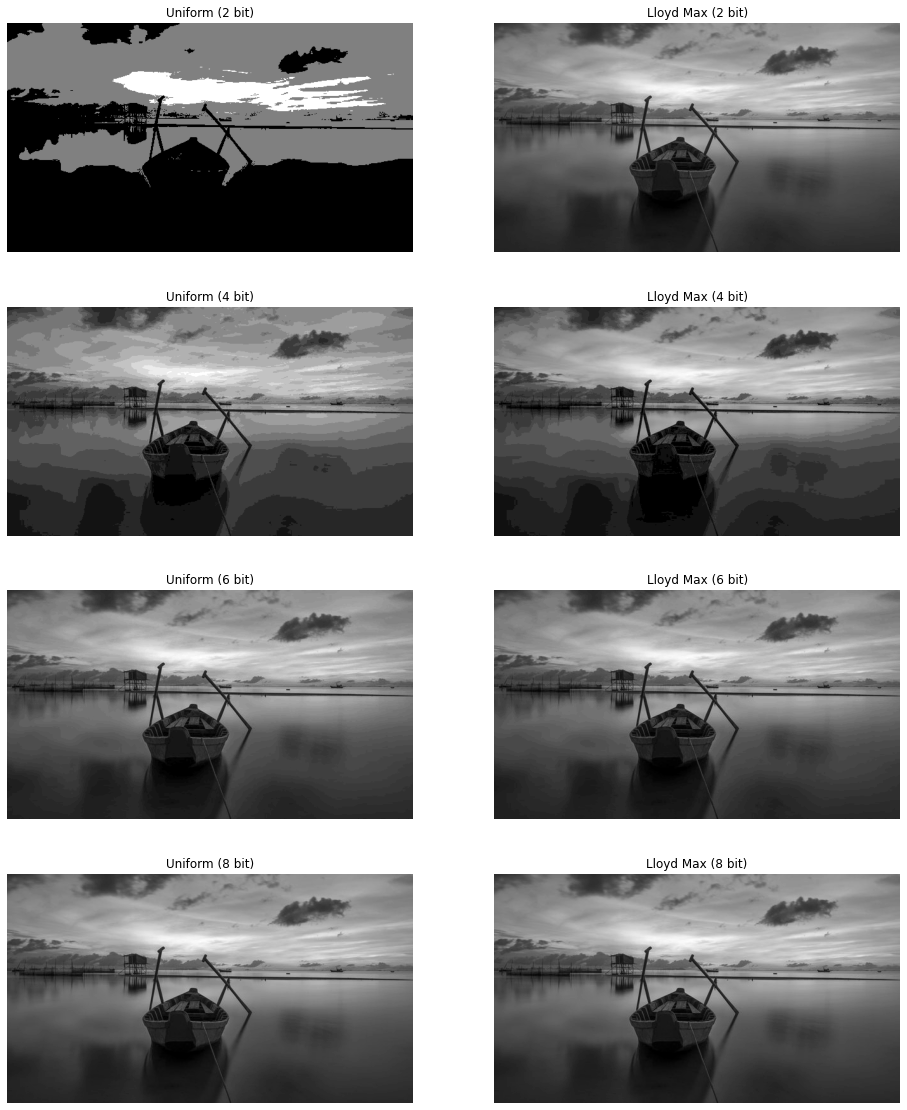

In [ ]:
# Do not change codes inside this cell
# Add your observations in next cell

boat_gray = cv2.imread("data/boat_gray.jpg", 0)

def plot_frame(subplot_id, img, name):
    plt.subplot(4, 2, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray")
    plt.axis("off")
    plt.title(name)
    
plt.figure(figsize=(16, 20))

count = 0
for i in [2, 4, 6, 8]:
    img_uni = uniform_quantisatioon(boat_gray, quantisation_bit=i)
    plot_frame(count, img_uni, "Uniform (" + str(i) + " bit)")
    
    img_lloyd = nonuniform_quantisatioon(boat_gray, quantisation_bit=i)
    plot_frame(count+1, img_lloyd, "Lloyd Max (" + str(i) + " bit)")
    
    count += 2

plt.show()

In [ ]:
your_observation = """
Lloyd max being a non uniform quantization provides much better results, however its more complex and hence slower as compared to uniform
"""

print(your_observation)


Lloyd max being a non uniform quantization provides much better results, however its more complex and hence slower as compared to uniform



### Task 3.2 Quantisation on Colored Images

Use your previous implementation to apply quantisation to each individual channels of colored image "separately".

In [ ]:
def uniform_color_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use uniform quantisation.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels
                       - Note that range should always be between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    Hint:
    + Use uniform_quantisation() to each channel.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    out_img = np.zeros((img.shape[0], img.shape[1], 3))

    for i in range(3):
        image = img[:,:,i]
        image = uniform_quantisatioon(image.copy(), quantisation_bit)
        out_img[:,:,i] = image.astype('uint8')
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [ ]:
def nonuniform_color_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use Lloyd-Max non-uniform quantisation method.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels i.e. '0' and '255'
                       - Note that range should always between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    Hint:
    + Use uniform_quantisation() to each channel.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    out_img = np.zeros((img.shape[0], img.shape[1], 3))

    for i in range(3):
        image = img[:,:,i]
        image = nonuniform_quantisatioon(image.copy(), quantisation_bit)
        out_img[:,:,i] = image.astype('uint8')
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

#### Quantise the given image for following bit-levels = 2, 4, 6, 8 using both the methods. 
Run below cell to plot images in a pyplot table and write your observation on the differences.

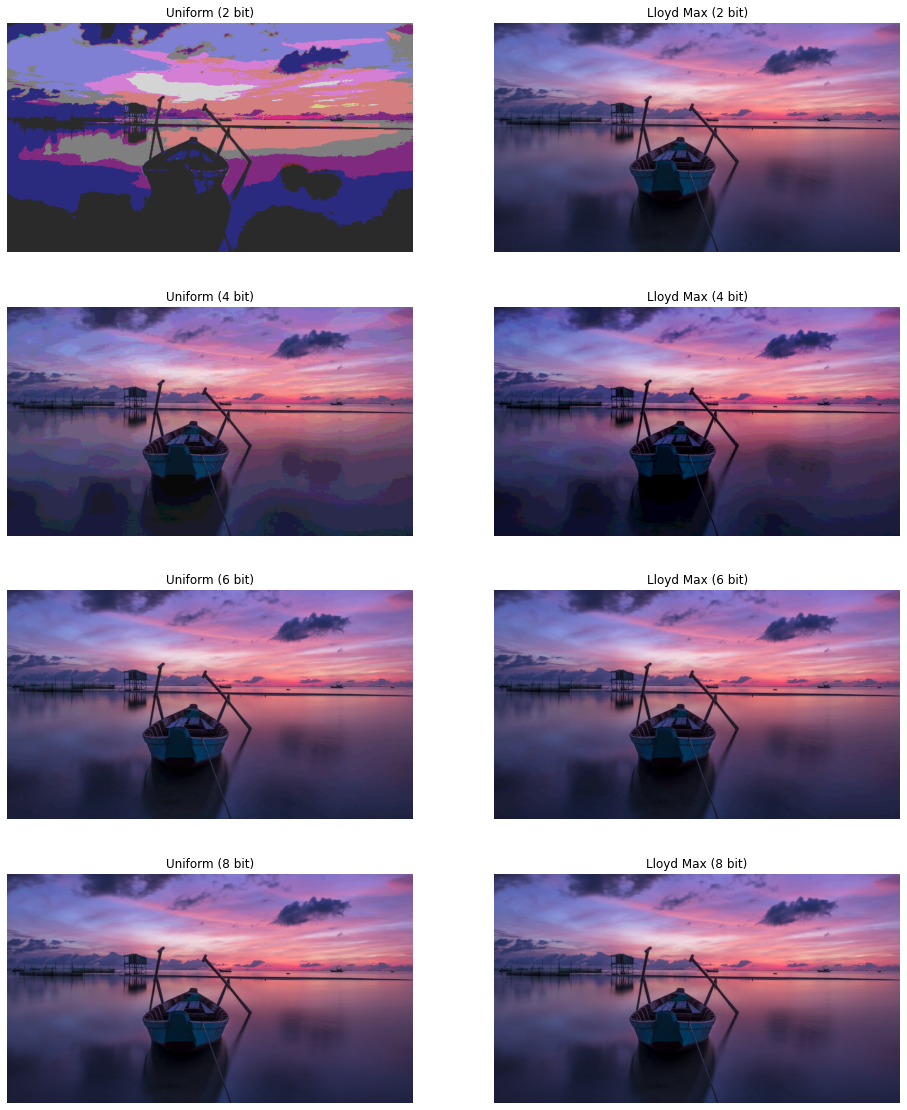

In [ ]:
# Do not change codes inside this cell
# Add your observations in next cell

boat_color = cv2.imread("data/boat.jpg")

def plot_frame(subplot_id, img, name):
    plt.subplot(4, 2, 1 + int(subplot_id))
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.title(name)
    
plt.figure(figsize=(16, 20))

count = 0
for i in [2, 4, 6, 8]:
    img_uni = uniform_color_quantisatioon(boat_color, quantisation_bit=i).astype('uint8')
    plot_frame(count, img_uni, "Uniform (" + str(i) + " bit)")
    
    img_lloyd = nonuniform_color_quantisatioon(boat_color, quantisation_bit=i).astype('uint8')
    plot_frame(count+1, img_lloyd, "Lloyd Max (" + str(i) + " bit)")
    
    count += 2
    
plt.show()

In [ ]:
your_observation = """
Again, the non uniform quantization is of superior quality but more time consuming than uniform quantization
"""

print(your_observation)


Again, the non uniform quantization is of superior quality but more time consuming than uniform quantization

